In [3]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import tensorflow as tf
from tensorflow import keras

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/S006.csv')
df

,timestamp,back_x,back_y,back_z,thigh_x,thigh_y,thigh_z,label
0,2019-01-12 00:00:00.000,-0.760242,0.299570,0.468570,-5.092732,-0.298644,0.709439,6
1,2019-01-12 00:00:00.010,-0.530138,0.281880,0.319987,0.900547,0.286944,0.340309,6
2,2019-01-12 00:00:00.020,-1.170922,0.186353,-0.167010,-0.035442,-0.078423,-0.515212,6
3,2019-01-12 00:00:00.030,-0.648772,0.016579,-0.054284,-1.554248,-0.950978,-0.221140,6
4,2019-01-12 00:00:00.040,-0.355071,-0.051831,-0.113419,-0.547471,0.140903,-0.653782,6
...,...,...,...,...,...,...,...,...
408704,2019-01-12 01:09:32.880,-0.690417,0.035710,-0.697054,0.228261,0.072950,0.985175,7
408705,2019-01-12 01:09:32.890,-0.745270,0.032438,-0.681320,-0.121986,0.063700,1.026665,7
408706,2019-01-12 01:09:32.900,-0.684827,0.037622,-0.703884,0.302960,0.076986,0.978313,7
408707,2019-01-12 01:09:32.910,-0.751518,0.028819,-0.668037,-0.241803,0.056675,1.026166,7


In [4]:
# 결측치 확인

df.isnull().sum()

timestamp    0
back_x       0
back_y       0
back_z       0
thigh_x      0
thigh_y      0
thigh_z      0
label        0
dtype: int64

Text(0.5, 1.0, 'Distribution of Hearth Disease Levels')

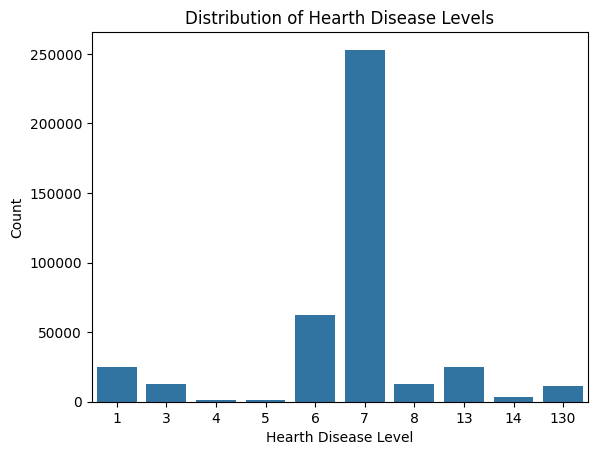

In [5]:
# 레이블 갯수 확인 (그래프)
sns.countplot(data = df, x="label")
plt.xlabel('Hearth Disease Level')
plt.ylabel("Count")
plt.title('Distribution of Hearth Disease Levels')

In [6]:
df['label'].value_counts()

7      253029
6       62682
13      25040
1       24889
8       13036
3       12693
130     11290
14       3130
5        1550
4        1370
Name: label, dtype: int64

Text(0.5, 1.0, 'Distribution of Hearth Disease Levels')

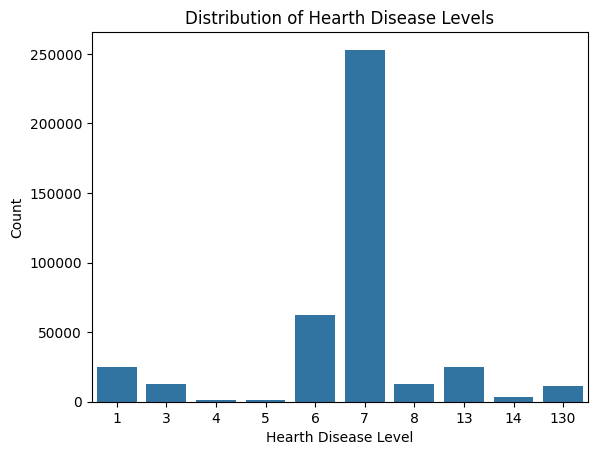

In [7]:
# 레이블 갯수 확인 (그래프)
sns.countplot(data = df, x="label")
plt.xlabel('Hearth Disease Level')
plt.ylabel("Count")
plt.title('Distribution of Hearth Disease Levels')

In [8]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
label = LabelEncoder()
df['label'] = label.fit_transform(df['label'])
df.head()

,timestamp,back_x,back_y,back_z,thigh_x,thigh_y,thigh_z,label
0,2019-01-12 00:00:00.000,-0.760242,0.299570,0.468570,-5.092732,-0.298644,0.709439,4
1,2019-01-12 00:00:00.010,-0.530138,0.281880,0.319987,0.900547,0.286944,0.340309,4
2,2019-01-12 00:00:00.020,-1.170922,0.186353,-0.167010,-0.035442,-0.078423,-0.515212,4
3,2019-01-12 00:00:00.030,-0.648772,0.016579,-0.054284,-1.554248,-0.950978,-0.221140,4
4,2019-01-12 00:00:00.040,-0.355071,-0.051831,-0.113419,-0.547471,0.140903,-0.653782,4


In [9]:
df['label'].value_counts()

5    253029
4     62682
7     25040
0     24889
6     13036
1     12693
9     11290
8      3130
3      1550
2      1370
Name: label, dtype: int64

In [10]:
df=df.drop('timestamp',axis=1)
df.head()

,back_x,back_y,back_z,thigh_x,thigh_y,thigh_z,label
0,-0.760242,0.299570,0.468570,-5.092732,-0.298644,0.709439,4
1,-0.530138,0.281880,0.319987,0.900547,0.286944,0.340309,4
2,-1.170922,0.186353,-0.167010,-0.035442,-0.078423,-0.515212,4
3,-0.648772,0.016579,-0.054284,-1.554248,-0.950978,-0.221140,4
4,-0.355071,-0.051831,-0.113419,-0.547471,0.140903,-0.653782,4


In [17]:
df0 = df[df['label']==0].head(13000).copy()
df1 = df[df['label']==1].copy()
df2 = df[df['label']==2].copy()
df3 = df[df['label']==3].copy()
df4 = df[df['label']==4].head(13000).copy()
df5 = df[df['label']==5].head(13000).copy()
df6 = df[df['label']==6].copy()
df7 = df[df['label']==7].head(13000).copy()
df8 = df[df['label']==8].copy()
df9 = df[df['label']==9].copy()

In [18]:
import pandas as pd

balanced_data = pd.DataFrame()
balanced_data = pd.concat([df0, df1, df2, df3, df4, df5, df6, df7, df8, df9])
balanced_data.shape

(95069, 7)

In [23]:
X=balanced_data.drop('label',axis=1)
X.head()

,back_x,back_y,back_z,thigh_x,thigh_y,thigh_z
46,-0.979810,0.064414,0.096672,-0.923951,0.028942,-0.275996
47,-0.988628,0.062305,0.094441,-0.997658,0.039747,-0.286079
48,-0.979188,0.065592,0.083119,-0.950199,0.059354,-0.286677
49,-0.987749,0.072967,0.088315,-0.996941,0.068661,-0.272558
50,-0.986095,0.069343,0.077932,-0.924641,0.043127,-0.309695


In [24]:
y=balanced_data['label']
y.value_counts()

6    13036
0    13000
4    13000
5    13000
7    13000
1    12693
9    11290
8     3130
3     1550
2     1370
Name: label, dtype: int64

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.2,
                                                    shuffle = True,
                                                    random_state = 21)

In [26]:
def split_sequences(sequences, n_steps):
	X, y = list(), list()
	for i in range(len(sequences)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the dataset
		if end_ix > len(sequences):
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix-1, -1]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)

In [27]:
# Merge train and test X/y data to apply sequence transformation function
y_train_array = np.array(y_train)
train_set = np.c_[X_train, y_train_array]

y_test_array = np.array(y_test)
test_set = np.c_[X_test, y_test_array]

# Apply sequence transformation using time step of 25 for both train and test data
# All sensing modalities are recorded at a sampling rate of 50 Hz, which is considered sufficient for capturing human activity.

X_train, y_train = split_sequences(train_set, 5)
print(X_train.shape, y_train.shape)

X_test, y_test = split_sequences(test_set, 5)
print(X_test.shape, y_test.shape)

(76051, 5, 6) (76051,)
(19010, 5, 6) (19010,)


In [28]:
y_train_onehot = pd.get_dummies(y_train).values
y_test_onehot = pd.get_dummies(y_test).values

print(y_train_onehot.shape)
print(y_test_onehot.shape)

(76051, 10)
(19010, 10)


In [29]:
print(X_train.shape)

(76051, 5, 6)


In [30]:
n_timesteps, n_features, n_outputs = X_train.shape[1], X_train.shape[2], y_train_onehot.shape[1]

In [31]:
# define model

from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import Input
from keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.layers import Input, Conv1D, Flatten, Dense, LSTM, Reshape
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, MaxPooling1D, TimeDistributed, LSTM, BatchNormalization, Input, concatenate, Conv1D
from tensorflow.keras.optimizers import Adam


model = Sequential()
model.add(Conv1D(filters=64,
                 kernel_size=3, activation='relu',
                 input_shape=(n_timesteps, n_features),padding='same'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Conv1D(filters=128,
                 kernel_size=3, activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Conv1D(filters=256,
                 kernel_size=3, activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(MaxPooling1D(pool_size=2))

model.add(keras.layers.Flatten())
model.add(Dropout(0.5))
model.add(Dense(100,
                activation='relu'))
model.add(Dense(n_outputs, activation='softmax'))

optimizer = Adam(learning_rate=0.001)

model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 5, 64)             1216      
                                                                 
 batch_normalization (Batch  (None, 5, 64)             256       
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 5, 64)             0         
                                                                 
 conv1d_1 (Conv1D)           (None, 5, 128)            24704     
                                                                 
 batch_normalization_1 (Bat  (None, 5, 128)            512       
 chNormalization)                                                
                                                                 
 dropout_1 (Dropout)         (None, 5, 128)            0

In [32]:
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.h5',
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=5,
                                                  restore_best_weights=True)

In [33]:
train_epochs = 30
history = model.fit(X_train, y_train_onehot, epochs=train_epochs, verbose=True,
                    validation_split=0.1, callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/30
2139/2139 [==============================] - 48s 21ms/step - loss: 1.3334 - accuracy: 0.4846 - val_loss: 0.9927 - val_accuracy: 0.5851
Epoch 2/30
  11/2139 [..............................] - ETA: 22s - loss: 1.0311 - accuracy: 0.5682

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2139/2139 [==============================] - 29s 13ms/step - loss: 1.0008 - accuracy: 0.5782 - val_loss: 0.9104 - val_accuracy: 0.6232
Epoch 3/30
2139/2139 [==============================] - 29s 14ms/step - loss: 0.9426 - accuracy: 0.6140 - val_loss: 0.8322 - val_accuracy: 0.6567
Epoch 4/30
2139/2139 [==============================] - 29s 13ms/step - loss: 0.8853 - accuracy: 0.6442 - val_loss: 0.7808 - val_accuracy: 0.6864
Epoch 5/30
2139/2139 [==============================] - 30s 14ms/step - loss: 0.8458 - accuracy: 0.6639 - val_loss: 0.7534 - val_accuracy: 0.6997
Epoch 6/30
2139/2139 [==============================] - 31s 14ms/step - loss: 0.8107 - accuracy: 0.6789 - val_loss: 0.7061 - val_accuracy: 0.7097
Epoch 7/30
2139/2139 [==============================] - 30s 14ms/step - loss: 0.7952 - accuracy: 0.6830 - val_loss: 0.6749 - val_accuracy: 0.7193
Epoch 8/30
2139/2139 [==============================] - 30s 14ms/step - loss: 0.7803 - accuracy: 0.6897 - val_loss: 0.6840 - val_accura

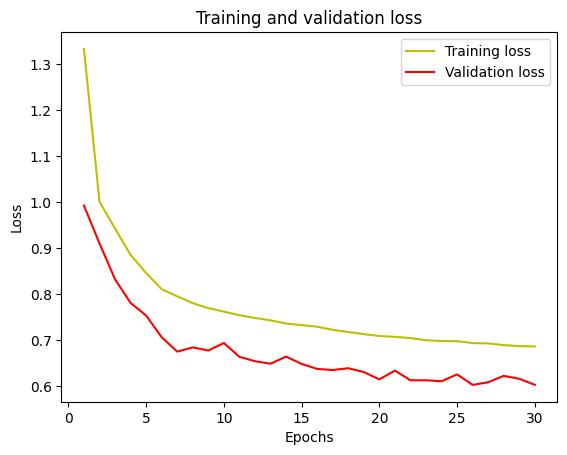

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

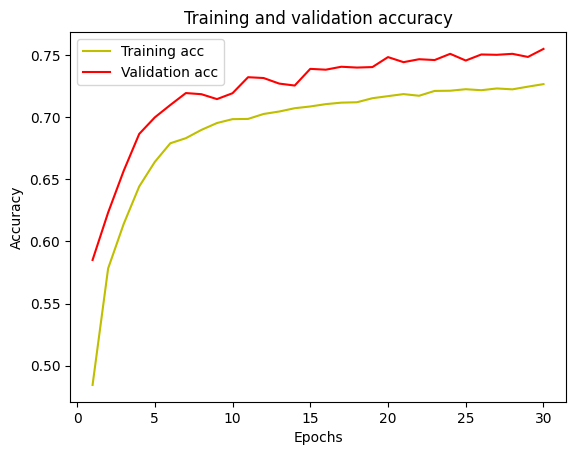

In [35]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [36]:
#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix

y_pred = model.predict(X_test)
y_test_class = np.argmax(y_test_onehot,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

595/595 [==============================] - 2s 3ms/step


In [37]:
#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       0.54      0.71      0.61      2552
           1       0.61      0.33      0.43      2599
           2       0.50      0.25      0.33       260
           3       0.87      0.57      0.68       345
           4       0.86      0.96      0.91      2591
           5       0.99      0.98      0.99      2599
           6       1.00      0.99      1.00      2516
           7       0.65      0.75      0.70      2671
           8       0.51      0.03      0.06       631
           9       0.61      0.74      0.67      2246

    accuracy                           0.75     19010
   macro avg       0.71      0.63      0.64     19010
weighted avg       0.74      0.75      0.73     19010

[[1819  419   19    6  119    7    1   45    4  113]
 [1305  865    9    5  268    2    1   23    0  121]
 [  72   19   64    6    1    3    0   86    0    9]
 [ 126    4    5  195    2    0    2   11    0    0]
 [  20   81    0    2 2488   